In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Open and explore data

data_postulaciones = pd.read_csv("POSTULACIONES_FUAS_2022_WEB.csv", sep=";", encoding = "utf-8-sig")
data_postulaciones = data_postulaciones.replace('Ã©','é', regex=True)
data_postulaciones = data_postulaciones.replace('Ã‘','Ñ', regex=True)
data_postulaciones = data_postulaciones.replace('Ã','í', regex=True)
data_postulaciones.head()


,ANIO_PROCESO,MRUN,REGION,NOMBRE_REGION,COMUNA,NOMBRE_COMUNA,FEC_NAC_ALU,EDAD,GENERO,PROCESO,COD_DEPE,NEM,ETNIA
0,2022,26,13,Región Metropolitana de Santiago,13130,San Miguel,200212,19,2,FUAS,3,595,1
1,2022,35,7,Región del Maule,7401,Linares,199711,24,1,FUAS,2,600,1
2,2022,51,13,Región Metropolitana de Santiago,13301,Colina,198305,39,2,FUAS,2,560,1
3,2022,55,5,Región de Valparaí­so,5801,Quilpué,198711,34,2,BVP,3,530,1
4,2022,55,5,Región de Valparaí­so,5801,Quilpué,198711,34,2,FUAS,3,530,1


In [3]:
# Filter students by region

students_region_1 = data_postulaciones[data_postulaciones.REGION == 1]
students_region_2 = data_postulaciones[data_postulaciones.REGION == 2]
students_region_3 = data_postulaciones[data_postulaciones.REGION == 3]
students_region_4 = data_postulaciones[data_postulaciones.REGION == 4]
students_region_5 = data_postulaciones[data_postulaciones.REGION == 5]
students_region_6 = data_postulaciones[data_postulaciones.REGION == 6]
students_region_7 = data_postulaciones[data_postulaciones.REGION == 7]
students_region_8 = data_postulaciones[data_postulaciones.REGION == 8]
students_region_9 = data_postulaciones[data_postulaciones.REGION == 9]
students_region_10 = data_postulaciones[data_postulaciones.REGION == 10]
students_region_11 = data_postulaciones[data_postulaciones.REGION == 11]
students_region_12 = data_postulaciones[data_postulaciones.REGION == 12]
students_region_13 = data_postulaciones[data_postulaciones.REGION == 13]

In [4]:
# Filter students by gender (1: male, 2: female)

students_male = data_postulaciones[data_postulaciones.GENERO == 1]
students_female = data_postulaciones[data_postulaciones.GENERO == 2]

In [16]:
# Filter students by type of school (1: Corporación municipal, 2: Municipal DAEM, 3: Particular subvencionado, 4: Particular pagado, 5: Corp. de Adm. Delegado, 6: SLEP)

students_corpmunicipal = data_postulaciones[data_postulaciones.COD_DEPE == "1"]
students_daemmunicipal = data_postulaciones[data_postulaciones.COD_DEPE == "2"]
students_psubvencionado = data_postulaciones[data_postulaciones.COD_DEPE == "3"]
students_ppagado = data_postulaciones[data_postulaciones.COD_DEPE == "4"]
students_cadmdel = data_postulaciones[data_postulaciones.COD_DEPE == "5"]
students_slep = data_postulaciones[data_postulaciones.COD_DEPE == "6"]

In [6]:
# Summary Statistics for Male and Female groups

female_nem_mean = round(np.mean(students_female["NEM"]), 2)
female_nem_std = round(np.std(students_female["NEM"]), 2)
female_nem_median = students_female["NEM"].median()
female_nem_mode = students_female["NEM"].mode()[0]
male_nem_mean = round(np.mean(students_male["NEM"]), 2)
male_nem_std = round(np.std(students_male["NEM"]))
male_nem_median = students_male["NEM"].median()
male_nem_mode = students_male["NEM"].mode()[0]

print(f"The mean of the NEM of the female group is {female_nem_mean}. The standard deviation of the NEM of the female group is {female_nem_std}.\nThis group has a median of {female_nem_median} and a mode of {female_nem_mode}.")
print(f"The mean of the NEM of the male group is {male_nem_mean}. The standard deviation of the NEM of the male group is {male_nem_std}.\nThis group has a median of {male_nem_median} and a mode of {male_nem_mode}.")

The mean of the NEM of the female group is 572.04. The standard deviation of the NEM of the female group is 53.56.
This group has a median of 570.0 and a mode of 550.
The mean of the NEM of the male group is 562.95. The standard deviation of the NEM of the male group is 53.
This group has a median of 560.0 and a mode of 550.


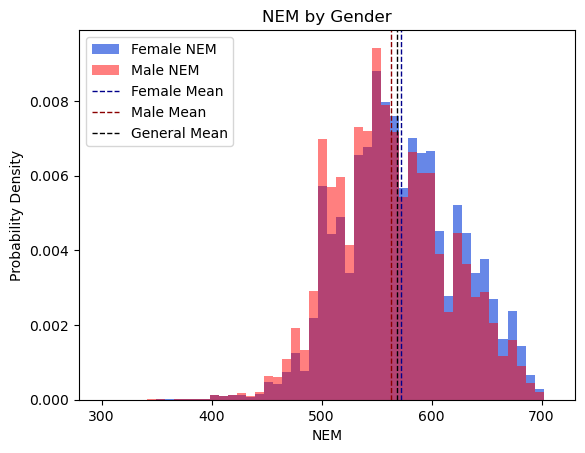

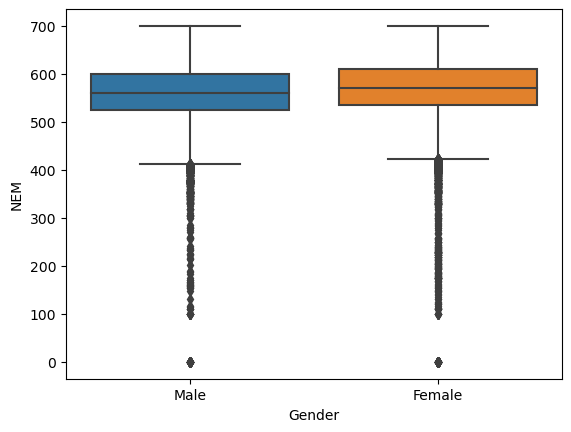

<Figure size 640x480 with 0 Axes>

In [35]:
# Histogram of NEM by Gender
plt.hist(x = students_female["NEM"], alpha=0.8, color="royalblue", density = True, label = "Female NEM", range = [300, 710], bins = 50)
plt.hist(x = students_male["NEM"], alpha=0.5, color="red", density = True, label ="Male NEM", range = [300, 710], bins = 50)
plt.axvline(students_female["NEM"].mean(), color='darkblue', linestyle='dashed', linewidth=1, label = "Female Mean")
plt.axvline(students_male["NEM"].mean(), color='darkred', linestyle='dashed', linewidth=1, label = "Male Mean")
plt.axvline(data_postulaciones["NEM"].mean(), color='k', linestyle='dashed', linewidth=1, label = "General Mean")
plt.legend(loc = "upper left")
plt.xlabel('NEM')
plt.ylabel('Probability Density')
plt.title("NEM by Gender")
plt.show()
plt.clf()


# Boxplot of NEM by Gender
ax = sns.boxplot(data = data_postulaciones, x= "GENERO", y = "NEM")
labels = ["Male", "Female"]
ax.set_xticklabels(labels)
ax.set(xlabel='Gender')
plt.show()
plt.clf()

In [18]:
# Summary statistics for type of schools

students_corpmunicipal_nem_mean = round(np.mean(students_corpmunicipal["NEM"]), 2)
students_corpmunicipal_nem_std = round(np.std(students_corpmunicipal["NEM"]), 2)
students_corpmunicipal_nem_median = students_corpmunicipal["NEM"].median()
students_corpmunicipal_nem_mode = students_corpmunicipal["NEM"].mode()[0]

print(f"The mean of the NEM of the Corporación Municipal type of school group is {students_corpmunicipal_nem_mean}. The standard deviation of the NEM of the Corporación Municipal type of school group is {students_corpmunicipal_nem_std}.\
\nThis group has a median of {students_corpmunicipal_nem_median} and a mode of {students_corpmunicipal_nem_mode}.")

students_daemmunicipal_nem_mean = round(np.mean(students_daemmunicipal["NEM"]), 2)
students_daemmunicipal_nem_std = round(np.std(students_daemmunicipal["NEM"]))
students_daemmunicipal_nem_median = students_daemmunicipal["NEM"].median()
students_daemmunicipal_nem_mode = students_daemmunicipal["NEM"].mode()[0]

print(f"The mean of the NEM of the DAEM Municipal type of school group is {students_daemmunicipal_nem_mean}. The standard deviation of the NEM of the DAEM Municipal type of school group is {students_daemmunicipal_nem_std}.\
\nThis group has a median of {students_daemmunicipal_nem_median} and a mode of {students_daemmunicipal_nem_mode}.")

students_psubvencionado_nem_mean = round(np.mean(students_psubvencionado["NEM"]), 2)
students_psubvencionado_nem_std = round(np.std(students_psubvencionado["NEM"]))
students_psubvencionado_nem_median = students_psubvencionado["NEM"].median()
students_psubvencionado_nem_mode = students_psubvencionado["NEM"].mode()[0]

print(f"The mean of the NEM of the Particular Subvencionado type of school group is {students_psubvencionado_nem_mean}. The standard deviation of the NEM of the Particular Subvencionado type of school group is {students_psubvencionado_nem_std}.\
\nThis group has a median of {students_psubvencionado_nem_median} and a mode of {students_psubvencionado_nem_mode}.")

students_ppagado_nem_mean = round(np.mean(students_ppagado["NEM"]), 2)
students_ppagado_nem_std = round(np.std(students_ppagado["NEM"]))
students_ppagado_nem_median = students_ppagado["NEM"].median()
students_ppagado_nem_mode = students_ppagado["NEM"].mode()[0]

print(f"The mean of the NEM of the Particular Pagado type of school group is {students_ppagado_nem_mean}. The standard deviation of the NEM of the Particular Pagado type of school group is {students_ppagado_nem_std}.\
\nThis group has a median of {students_ppagado_nem_median} and a mode of {students_ppagado_nem_mode}.")

students_cadmdel_nem_mean = round(np.mean(students_cadmdel["NEM"]), 2)
students_cadmdel_nem_std = round(np.std(students_cadmdel["NEM"]))
students_cadmdel_nem_median = students_cadmdel["NEM"].median()
students_cadmdel_nem_mode = students_cadmdel["NEM"].mode()[0]

print(f"The mean of the NEM of the Corporación de Adm. Delegada type of school group is {students_cadmdel_nem_mean}. The standard deviation of the NEM of the Corporación de Adm. Delegada type of school group is {students_cadmdel_nem_std}.\
\nThis group has a median of {students_cadmdel_nem_median} and a mode of {students_cadmdel_nem_mode}.")

students_slep_nem_mean = round(np.mean(students_slep["NEM"]), 2)
students_slep_nem_std = round(np.std(students_slep["NEM"]))
students_slep_nem_median = students_slep["NEM"].median()
students_slep_nem_mode = students_slep["NEM"].mode()[0]

print(f"The mean of the NEM of the SLEP type of school group is {students_slep_nem_mean}. The standard deviation of the NEM of the SLEP type of school group is {students_slep_nem_std}.\
\nThis group has a median of {students_slep_nem_median} and a mode of {students_slep_nem_mode}.")

The mean of the NEM of the Corporación Municipal type of school group is 556.69. The standard deviation of the NEM of the Corporación Municipal type of school group is 51.9.
This group has a median of 553.0 and a mode of 550.
The mean of the NEM of the DAEM Municipal type of school group is 567.9. The standard deviation of the NEM of the DAEM Municipal type of school group is 52.
This group has a median of 565.0 and a mode of 550.
The mean of the NEM of the Particular Subvencionado type of school group is 570.99. The standard deviation of the NEM of the Particular Subvencionado type of school group is 52.
This group has a median of 570.0 and a mode of 550.
The mean of the NEM of the Particular Pagado type of school group is 595.91. The standard deviation of the NEM of the Particular Pagado type of school group is 58.
This group has a median of 600.0 and a mode of 600.
The mean of the NEM of the Corporación de Adm. Delegada type of school group is 568.39. The standard deviation of the N

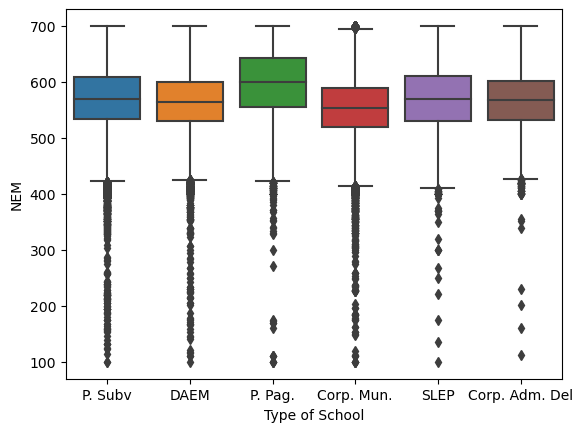

<Figure size 640x480 with 0 Axes>

In [28]:
# Drop rows with NA values in COD_DEPE column
data_postulaciones_cod_depe_filtered = data_postulaciones[data_postulaciones.COD_DEPE != " "]

# Boxplot of NEM by type of school

ax = sns.boxplot(data = data_postulaciones_cod_depe_filtered, x= "COD_DEPE", y = "NEM")
labels = ["P. Subv", "DAEM", "P. Pag.", "Corp. Mun.", "SLEP", "Corp. Adm. Del"]
ax.set_xticklabels(labels)
ax.set(xlabel='Type of School')
plt.show()
plt.clf()

In [ ]:
# Is there a statistically significative difference between P. pag.'s nem results and and Corp Mun.' nem results?


# Summary statistics for region
# Boxplot of NEM by region
# Association of NEM by region

# Scatterplot of NEM by Age
# Covariance of NEM and Age
# Correlation of NEM and Age

# Conclusions